In [8]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import psycopg2
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering,KMeans
import pandas as pd

In [2]:

con = psycopg2.connect(database="tietotuotteet",user="sa_monimuotoisuus_update",password="pelinympupdatemikko",host="10.24.200.87",port="5434")


In [42]:
#sql = "SELECT * FROM monimuotoisuus.latvusrajatut_momu_test limit 50000"
sql="""(select * from monimuotoisuus.latvusrajatut_momu_test
where lcv > 0.2 and lskew > 0 limit 5000)
union all
(select * from monimuotoisuus.latvusrajatut_momu_test
where lcv > 0.2 and lskew < 0 limit 5000)
union
(select * from monimuotoisuus.latvusrajatut_momu_test
where lcv < 0.2 and lskew < 0 limit 5000)
union
(select * from monimuotoisuus.latvusrajatut_momu_test
where lcv < 0.2 and lskew > 0 limit 5000)"""
df = gpd.GeoDataFrame.from_postgis(sql=sql,con=con,geom_col='geom')
df

,objectid,id,laser_h,laser_tih,x,y,lahop,lposuus,biod,lcv,lskew,geom
0,2129728,2547960,12.31,82.8,218968.25,6997463.75,0.18,28.6,0.26,0.280,0.111,"POLYGON ((218976.000 6997472.000, 218975.500 6..."
1,2114264,2412025,4.10,9.0,220456.00,6993496.00,0.09,28.9,0.54,0.243,0.177,"POLYGON ((220464.000 6993488.000, 220464.000 6..."
2,2133194,2531435,3.90,26.3,219912.00,6996600.00,0.12,26.9,0.18,0.314,0.130,"POLYGON ((219920.000 6996592.000, 219920.000 6..."
3,2112278,2427518,3.95,24.8,219048.25,6993720.00,0.13,23.6,0.61,0.286,0.176,"POLYGON ((219056.000 6993713.000, 219054.500 6..."
4,2108531,2425295,18.30,36.5,220888.75,6994664.25,0.44,22.0,0.43,0.227,0.006,"POLYGON ((220897.500 6994659.000, 220897.500 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2184055,2670071,7.15,65.2,221192.25,7000343.00,0.16,20.8,0.54,0.103,0.053,"POLYGON ((221200.000 7000352.000, 221199.000 7..."
19996,2167029,2565248,16.73,59.3,221751.25,6996136.00,0.24,25.4,0.46,0.078,-0.124,"POLYGON ((221758.500 6996143.000, 221758.500 6..."
19997,2166690,2570839,14.79,50.2,221672.00,6996617.75,0.20,32.6,0.60,0.092,-0.154,"POLYGON ((221679.000 6996622.500, 221678.500 6..."
19998,2179548,2678072,6.07,54.3,222472.00,6998712.00,0.07,29.2,0.10,0.092,0.099,"POLYGON ((222480.000 6998704.000, 222480.000 6..."


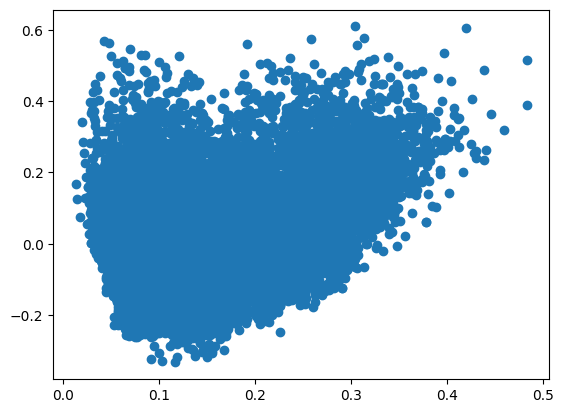

In [43]:
plt.scatter(df['lcv'],df['lskew'])
plt.show()

In [44]:
data = list(zip(df['lcv'],df['lskew']))

#linkage_data = linkage(data, method='ward', metric='euclidean')
#dendrogram(linkage_data)

#plt.show()

C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\clust

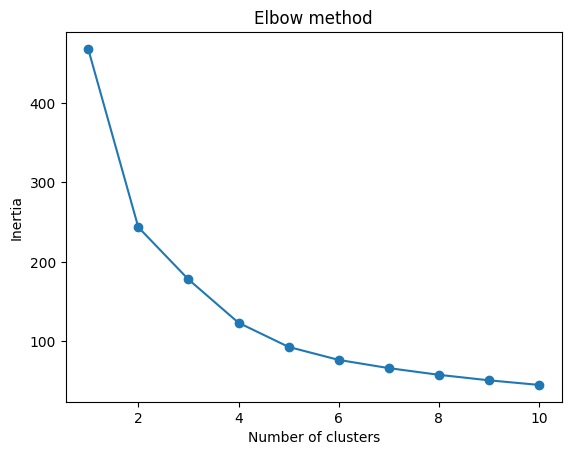

In [45]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


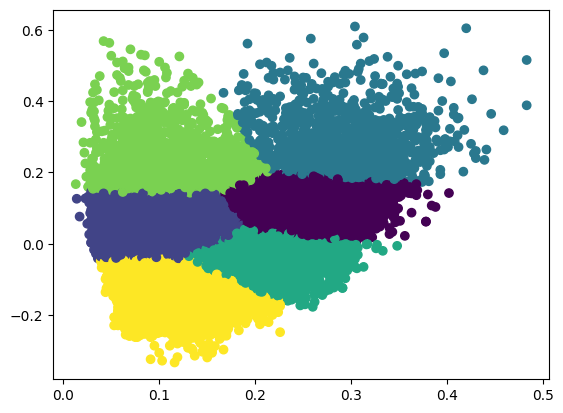

In [47]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data)

plt.scatter(df['lcv'],df['lskew'], c=kmeans.labels_)
plt.show()

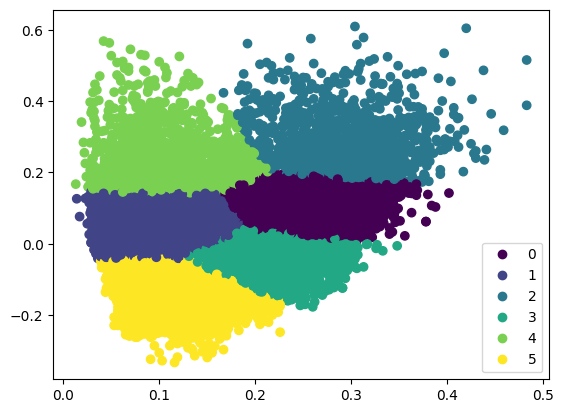

In [50]:
fig, ax = plt.subplots()
scatter = ax.scatter(df['lcv'],df['lskew'], c=kmeans.labels_)
legend = ax.legend(*scatter.legend_elements())
plt.show()

In [20]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

In [24]:
labels

array([4, 6, 3, ..., 1, 0, 1], dtype=int64)

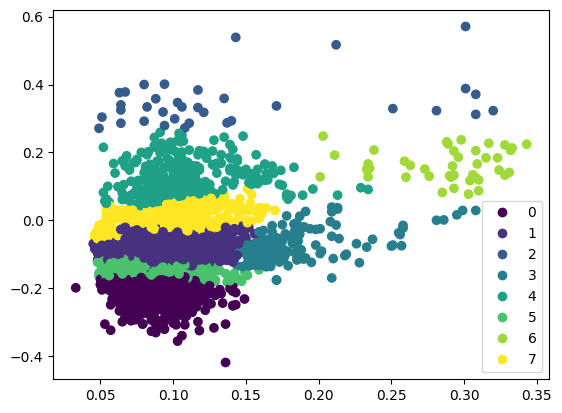

In [31]:
fig, ax = plt.subplots()
scatter = ax.scatter(df['lcv'],df['lskew'], c=labels)
legend = ax.legend(*scatter.legend_elements())
plt.show()

In [49]:
label_df = pd.DataFrame(kmeans.labels_)
#label_df
join = pd.concat([df,label_df],axis=1)
join.rename(columns = {0:"class"},inplace=True)
join

,objectid,id,laser_h,laser_tih,x,y,lahop,lposuus,biod,lcv,lskew,geom,class
0,2129728,2547960,12.31,82.8,218968.25,6997463.75,0.18,28.6,0.26,0.280,0.111,"POLYGON ((218976.000 6997472.000, 218975.500 6...",0
1,2114264,2412025,4.10,9.0,220456.00,6993496.00,0.09,28.9,0.54,0.243,0.177,"POLYGON ((220464.000 6993488.000, 220464.000 6...",0
2,2133194,2531435,3.90,26.3,219912.00,6996600.00,0.12,26.9,0.18,0.314,0.130,"POLYGON ((219920.000 6996592.000, 219920.000 6...",0
3,2112278,2427518,3.95,24.8,219048.25,6993720.00,0.13,23.6,0.61,0.286,0.176,"POLYGON ((219056.000 6993713.000, 219054.500 6...",0
4,2108531,2425295,18.30,36.5,220888.75,6994664.25,0.44,22.0,0.43,0.227,0.006,"POLYGON ((220897.500 6994659.000, 220897.500 6...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2184055,2670071,7.15,65.2,221192.25,7000343.00,0.16,20.8,0.54,0.103,0.053,"POLYGON ((221200.000 7000352.000, 221199.000 7...",1
19996,2167029,2565248,16.73,59.3,221751.25,6996136.00,0.24,25.4,0.46,0.078,-0.124,"POLYGON ((221758.500 6996143.000, 221758.500 6...",5
19997,2166690,2570839,14.79,50.2,221672.00,6996617.75,0.20,32.6,0.60,0.092,-0.154,"POLYGON ((221679.000 6996622.500, 221678.500 6...",5
19998,2179548,2678072,6.07,54.3,222472.00,6998712.00,0.07,29.2,0.10,0.092,0.099,"POLYGON ((222480.000 6998704.000, 222480.000 6...",1


<AxesSubplot:>

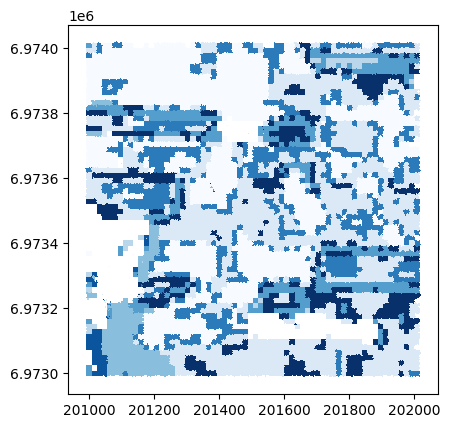

In [49]:
join.plot('class',cmap="Blues")

In [51]:
join.to_file(r"S:\test_mjk\aineistot\Mallinnus\latvusrajatut.gpkg",layer="Vaasa_testi",driver="GPKG")